<a href="https://colab.research.google.com/github/tantai17132002/do_an_1/blob/main/phan_tich_du_lieu_game_lmht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. Nhập thư viện.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import json
sns.set_style('darkgrid')

%matplotlib inline

In [11]:
def idToName(ID, dic):
    '''
    ID: lấy ID từ file dữ liệu gốc.
    dic: Champ từ file json.
    Chuyển đổi ID thành tên champ
    '''
    champ = dic['name'][ID]
    return champ

def getTag(name, data):
    '''
    name: tên champ được liệt kê trong khung dữ liệu,
    data: champInfo
    Lấy thẻ chính từ champInfo
    '''
    tags = data['tags'][name][0]
    return tags

def numToColor(data):
    '''
    data: khung dữ liệu chính.
    được sử dụng lấy màu của đội từ 0 đến 1
    '''
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color


## Nhập dữ liệu gốc.

In [12]:
data = pd.read_csv('games.csv')
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


## Nhập thông tin champ file json và lấy dữ liệu.

In [14]:
jDict = pd.read_json('champion_info_2.json')
champInfo = pd.read_json((jDict['data']).to_json(), orient='index')
champInfo.head()

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


In [15]:
spellJson = pd.read_json('champion_info.json')
spellInfo = pd.read_json((spellJson['data']).to_json(),orient='index')
spellInfo.head()

,title,id,key,name
1,the Dark Child,1,Annie,Annie
10,The Judicator,10,Kayle,Kayle
101,the Magus Ascendant,101,Xerath,Xerath
102,the Half-Dragon,102,Shyvana,Shyvana
103,the Nine-Tailed Fox,103,Ahri,Ahri


### Tạm thời đặt index thành id





In [16]:
champInfo.set_index(['id'], inplace=True)
champInfo.head()

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu


## Tạo danh sách các cột do người chơi lựa chọn và một danh sách khác để cấm tướng.

In [23]:
champCols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
banCols = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]
sumSpellsCols = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']

## Áp dụng hàm idToName cho các cột này để chúng ta có tên champ thay vì tên ID.

In [24]:
for c in champCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo))

for c in banCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo)) 

for c in sumSpellsCols:
    data[c] = data[c].apply(lambda x: idToName(x, spellInfo))

In [9]:
data[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [11]:
data[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [10]:
data[sumSpellsCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Alistar,Twisted Fate,Galio,Twisted Fate,Twisted Fate,LeBlanc,Master Yi,Urgot,Twisted Fate,Sion,Master Yi,Twisted Fate,Twisted Fate,LeBlanc,Urgot,Twisted Fate,Sion,Twisted Fate,Twisted Fate,Galio
1,LeBlanc,Twisted Fate,Alistar,Twisted Fate,Twisted Fate,Galio,Twisted Fate,Sion,Twisted Fate,Master Yi,Twisted Fate,Alistar,Twisted Fate,Sion,Master Yi,Twisted Fate,Twisted Fate,Sion,Twisted Fate,LeBlanc
2,Twisted Fate,LeBlanc,Master Yi,Twisted Fate,Galio,Twisted Fate,Twisted Fate,Alistar,Alistar,Twisted Fate,Twisted Fate,LeBlanc,Sion,Twisted Fate,Twisted Fate,Alistar,Twisted Fate,Master Yi,LeBlanc,Twisted Fate
3,Twisted Fate,Alistar,Twisted Fate,Sion,Twisted Fate,LeBlanc,Twisted Fate,Annie,Master Yi,Twisted Fate,Sion,Twisted Fate,Master Yi,Twisted Fate,Twisted Fate,Galio,Twisted Fate,Sion,Twisted Fate,LeBlanc
4,Twisted Fate,Alistar,Master Yi,Twisted Fate,Twisted Fate,Galio,Twisted Fate,LeBlanc,LeBlanc,Twisted Fate,Galio,Twisted Fate,Twisted Fate,Alistar,Master Yi,Twisted Fate,Twisted Fate,Alistar,Twisted Fate,LeBlanc


## Đặt chỉ mục khung dữ liệu champInfo thành tên champion

In [25]:
champInfo.set_index(['name'],inplace=True)
champInfo.head()

,tags,title,key
name,,,
Aatrox,"[Fighter, Tank]",the Darkin Blade,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri
Akali,[Assassin],the Fist of Shadow,Akali
Alistar,"[Tank, Support]",the Minotaur,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,Amumu


## Áp dụng hàm getTag cho các cột này để có các cột thẻ tướng chính mới

In [26]:
for col in champCols:
    data[col + '_tags'] = data[col].apply(lambda x: getTag(x, champInfo))
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


## Hãy xem các lượt cấm và chọn tướng #

In [28]:
#Tạo một loạt các lựa chọn và cấm được sắp xếp, cũng như một loạt thẻ chính cho mỗi lượt chọn tướng
sumPicks = pd.concat([data['t1_champ1id'],data['t1_champ2id'],data['t1_champ3id'],data['t1_champ4id'],data['t1_champ5id'],
                      data['t2_champ1id'],data['t2_champ2id'],data['t2_champ3id'],data['t2_champ4id'],data['t2_champ5id']],
                      ignore_index=True)
sortedPicks = sorted(sumPicks)
sumBans = pd.concat([data['t1_ban1'],data['t1_ban2'],data['t1_ban3'],data['t1_ban4'],data['t1_ban5'],
                     data['t2_ban1'],data['t2_ban2'],data['t2_ban3'],data['t2_ban4'],data['t2_ban5']],
                     ignore_index=True)
sortedBans = sorted(sumBans)

## Tính tổng số lượt cấm và chọn tướng trên toàn bộ tập dữ liệu #

Text(0.5, 1.0, 'Tướng Được Cấm')

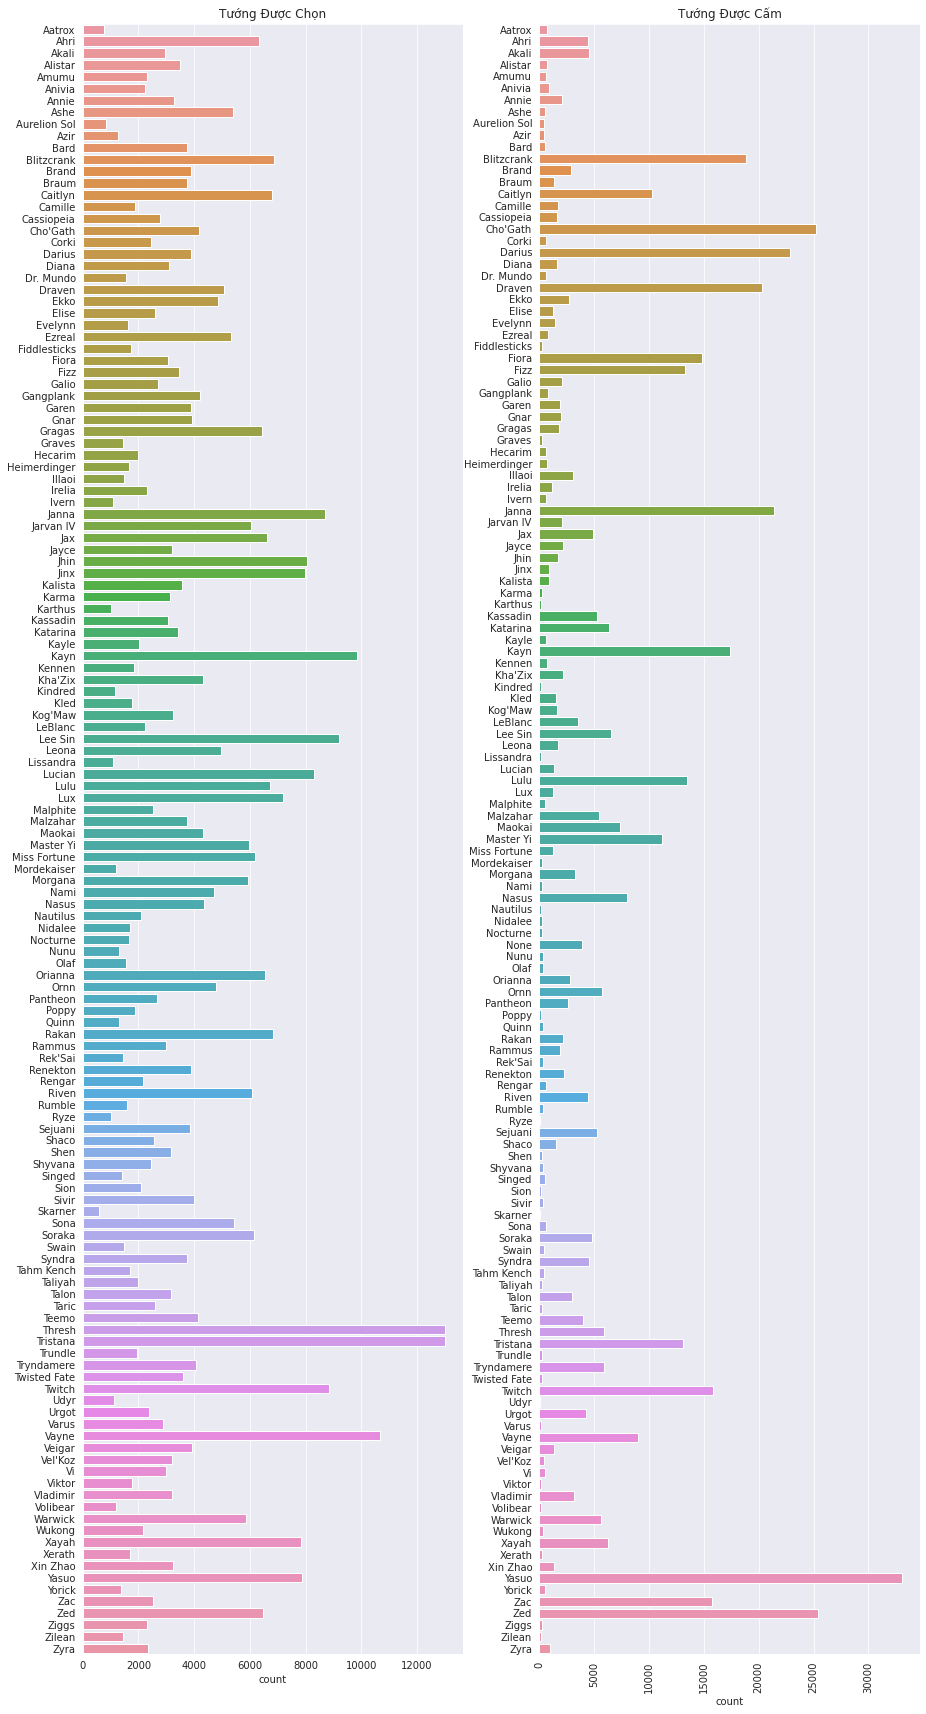

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sortedPicks, data=data, ax=ax1)
sns.countplot(y=sortedBans, data=data, ax=ax2)
ax1.set_title('Tướng Được Chọn')
ax2.set_title('Tướng Được Cấm')

-> thấy số lượng Thresh và Tristana đã trở nên phổ biến, cũng như số người THỰC SỰ không thích đấu với Yasuo, Zed, Cho'Gath và Darius!

## Just for fun, a countplot of types of champions and summoner spells used ##

In [32]:
tagsCols = ['t1_champ1id_tags', 't1_champ2id_tags', 't1_champ3id_tags',
       't1_champ4id_tags', 't1_champ5id_tags', 't2_champ1id_tags',
       't2_champ2id_tags', 't2_champ3id_tags', 't2_champ4id_tags',
       't2_champ5id_tags']

In [33]:
tagsTotals = data[tagsCols].apply(pd.value_counts)
tagsTotals['count'] = tagsTotals[tagsCols].sum(axis=1)
tagsTotals

,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags,count
Fighter,13362,12767,12961,12893,13530,13282,12998,13000,12897,13394,131084
Marksman,11413,12144,11939,12063,11247,11511,11939,11888,12062,11340,117546
Mage,9151,8674,8420,8591,8816,9016,8680,8716,8615,8776,87455
Support,6260,6790,6902,6887,6533,6491,6902,6843,6834,6654,67096
Tank,6130,6219,6421,6249,6142,6098,6174,6257,6233,6232,62155
Assassin,5174,4896,4847,4807,5222,5092,4797,4786,4849,5094,49564


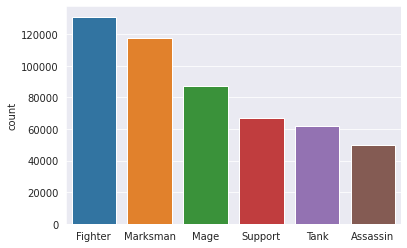

In [18]:
sns.barplot(x=tagsTotals.index,y=tagsTotals['count'])

In [34]:
spellsTotals = data[sumSpellsCols].apply(pd.value_counts)
spellsTotals['count'] = spellsTotals[sumSpellsCols].sum(axis=1)
spellsTotals

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,...,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,count
Alistar,4968,6395,4576,5954,4664,6000,4651,6020,5083,6291,...,6358,4693,6085,4736,6067,4581,5926,5024,6350,109401
Annie,160,199,151,153,135,168,136,134,125,182,...,190,129,159,136,182,154,181,149,184,3154
Galio,3640,4394,3904,4614,3928,4738,3992,4723,3763,4557,...,4459,3912,4596,3928,4704,3855,4717,3885,4511,84576
LeBlanc,4581,5758,4922,6309,4902,6180,4971,6136,4500,5826,...,5934,4854,6197,4834,6173,4896,6276,4571,5746,108043
Master Yi,4711,5635,4780,5520,4789,5511,4681,5579,4768,5550,...,5656,4690,5558,4621,5594,4894,5594,4777,5563,103062
Miss Fortune,702,890,649,814,620,852,630,834,648,814,...,881,637,887,617,823,634,838,625,804,14880
Sion,3820,5205,3832,4930,3786,4894,3777,4982,3917,5093,...,5047,3823,4875,3758,4980,3715,4899,3956,5032,88258
Twisted Fate,28164,22216,27998,22490,28019,22397,27988,22393,27966,22377,...,22204,28037,22427,28170,22255,28089,22322,27838,22589,504121
Urgot,744,798,678,706,647,750,664,689,720,800,...,761,715,706,690,712,672,737,665,711,14305


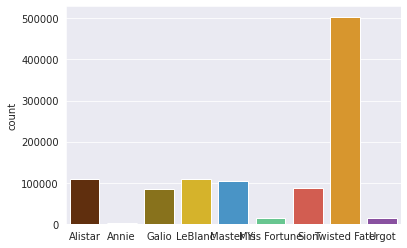

In [35]:
spellColors = ["#6E2C00","#1A5276","#9A7D0A","#F1C40F","#3498DB","#58D68D","#E74C3C","#F39C12","#8E44AD"]
sns.barplot(x=spellsTotals.index,y=spellsTotals['count'],palette=spellColors)

### Tạo khung dữ liệu mới với các màu nhóm làm giá trị để nhìn dễ dàng hơn

In [36]:
dataClean = data.replace([0,1,2],['neither','blue','red'])
dataClean.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,blue,red,blue,blue,blue,blue,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,blue,blue,blue,blue,neither,blue,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,blue,red,blue,blue,blue,red,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,blue,blue,blue,blue,blue,blue,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,blue,red,blue,blue,blue,blue,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


### Lấy các cột và tính giá trị trên chúng, sau đó lập chỉ mục lại chúng để làm cho dữ liệu trông gọn gàng hơn.

In [37]:
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
firstTotals = dataClean[firsts].apply(pd.value_counts)
newIndex = ['blue','red','neither']
firstSort = firstTotals.reindex(index=newIndex)
firstSort

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
blue,26113,25861,23054,14758,24690,12948
red,24822,24416,22160,16474,24800,12363
neither,555,1213,6276,20258,2000,26179


### Đối với các dữ liệu, tạo một bảng màu tùy chỉnh, sau đó tạo các dữ liệu bằng vòng lặp for.


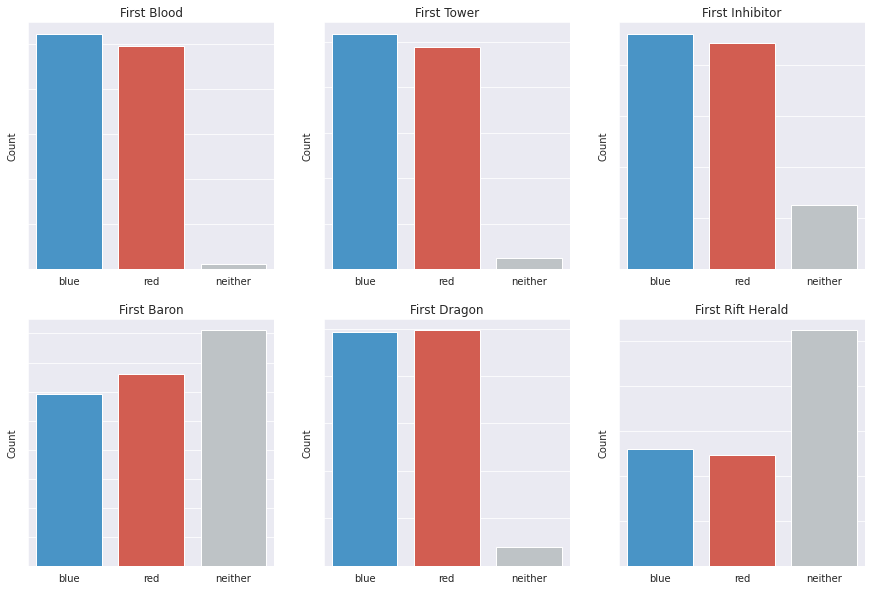

In [40]:
plotColors = ['#3498DB','#E74C3C','#BDC3C7']
firstLabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([])
    ax.set_title(firstLabels[i-1])

* Hầu hết các âm mưu đều khá đồng đều, nhưng sự khác biệt về con baron đầu tiên có thể là do vị trí gần baron với căn cứ màu đỏ, và thực tế là vị trí của chúng khiến việc ăn trộm dễ dàng hơn.
* Số lượng 'không' cho con baron đầu tiên cho thấy rằng hơn một nửa số trận đấu kết thúc mà không có con baron nào được thực hiện.
* First Blood nghiêng về đội xanh một chút. Có lẽ đội xanh có lợi thế đầu trận về mặt kiểm soát rừng.

